# Feature Engineering

## Categorical Features

### Dictvectorizer

In [2]:
Data = [
    {'price':850000, 'room':4, 'neighborhood':'Queen Anne'}, 
    {'price':790000, 'room':3, 'neighborhood':'Fremont'},
    {'price':650000, 'room':3, 'neighborhood':'Wallingford'},
    {'price':600000, 'room':2, 'neighborhood':'Fremont'},
]

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
Vec = DictVectorizer(sparse=False, dtype=int)
Vec.fit_transform(Data)


array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 790000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [5]:
Vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'room']

### Text Vectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [7]:
data = ['problem of evil', 'evil queen', 'horizon problem']

In [8]:
vec = CountVectorizer()
X = vec.fit_transform(data)
pd.DataFrame(X.toarray(), columns= vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vec2 = TfidfVectorizer()
X2 = vec2.fit_transform(data)
pd.DataFrame(X2.toarray(), columns= vec2.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### figure Vectorizer

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

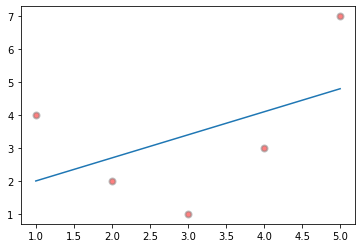

In [59]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x,y, facecolor='red', linewidth=2, edgecolor='grey', alpha=0.5)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
y_model = model.fit(x[:, None], y).predict(x[:, None])
plt.plot(x, y_model)

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly = PolynomialFeatures(degree=4, include_bias=False)
x_transform = poly.fit_transform(x[:, None]) # input is a 2-dimentional array as the feature array


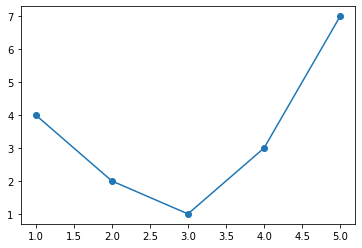

In [62]:
model2= model.fit(x_transform, y)
yfit = model2.predict(x_transform)
plt.scatter(x, y)
plt.plot(x, yfit)

In [65]:
modelbest = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

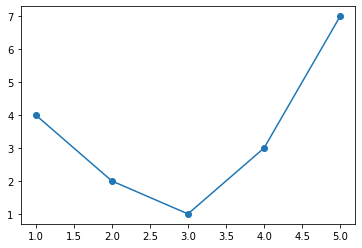

In [70]:
y_ = modelbest.fit(x[:, None], y).predict(x[:, None])
plt.scatter(x,y)
plt.plot(x,y_)

## Imputation of Missing Data

In [79]:
from numpy import nan

X_missing= np.array([[ nan, 0, 3], 
                     [ 3, 7, 9], 
                     [ 3, 5, 2], 
                    [4, nan, 6 ],
                     [ 8, 8, 1]])

y = np.array([14, 16, -1, 8, -5])

In [80]:
from sklearn.impute import SimpleImputer

In [81]:
imp = SimpleImputer(strategy = 'most_frequent')

In [84]:
X3 = imp.fit_transform(X_missing)

In [85]:
model = LinearRegression()
print(X3)

[[3. 0. 3.]
 [3. 7. 9.]
 [3. 5. 2.]
 [4. 0. 6.]
 [8. 8. 1.]]


In [87]:
model.fit(X3,y).predict(X3)

array([ 8.21123945, 14.1271657 ,  3.06186139, 12.49966681, -5.89993336])

## Feature Pipelines

In [64]:
from sklearn.pipeline import make_pipeline

In [84]:
model = make_pipeline(SimpleImputer(strategy = 'mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [85]:
y_model = model.fit(X_missing, y).predict(X3)

In [86]:
y_model

array([14., 16., -1.,  8., -5.])